In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib import colormaps
list(colormaps)
plt.style.use('grayscale')

In [3]:
dv=[0,0]
dv[0],dv[1],dp=pd.read_excel("data.xlsx",sheet_name=0),pd.read_excel("data.xlsx",sheet_name=1),pd.read_excel("data.xlsx",sheet_name=2)

In [16]:
from scipy.integrate import solve_ivp
def NAN(x,p0,S,m,gamma,a0):
    g0=S*p0/m
    a=np.sqrt(gamma/(2*a0**2))
    return np.sqrt(1-np.exp(-2*g0*a*a*x))/a
def SM(x,p0,S,m,gamma,a0):
    return np.sqrt(2*S*x*(p0-1e5)/m)
def NA(x,p0,S,m,gamma,a0):
    def dudt(t,p):
        F=(1-((p[0]/a0)**2)*(gamma-1)/2)**(gamma/(gamma-1))
        d=np.array([0.,0.])
        d[1]=p[0]
        d[0]=F*p0*S/m
        #print(d)
        return d
    def event(t,p):
        return x-p[1]
    event.terminal = True
    event.direction = 0
    sol = solve_ivp(dudt, [0, 10000], [0,0], events=event, dense_output=True)
    return sol.y_events[0][0][0]
def A(x,p0,S,m,gamma,a0,gamma2=1.4):
    def dudt(t,p):
        F=(1-((p[0]/a0)**2)*(gamma-1)/2)**(gamma/(gamma-1))
        F+=-(1e5/p0) * (1-((p[0]/a0)**2)*(gamma2-1)/2)**(gamma2/(gamma2-1))
        d=np.array([0.,0.])
        d[1]=p[0]
        d[0]=F*p0*S/m
        #print(d)
        return d
    def event(t,p):
        return x-p[1]
    event.terminal = True
    event.direction = 0
    sol = solve_ivp(dudt, [0, 10000], [0,0], events=event, dense_output=True)
    return sol.y_events[0][0][0]

In [17]:
40*40/100,6.7**2/4*np.pi

(16.0, 35.25652355491145)

In [18]:
p=(0.35,4e5,35.25/1e6,0.0006,1.4,343)
A(*p),NA(*p),NAN(*p)

(109.09974399184769, 125.25086136037626, 125.18228659128839)

In [19]:
2*370/(2-1)

740.0

In [20]:
np.linspace(0,55,20)

array([ 0.        ,  2.89473684,  5.78947368,  8.68421053, 11.57894737,
       14.47368421, 17.36842105, 20.26315789, 23.15789474, 26.05263158,
       28.94736842, 31.84210526, 34.73684211, 37.63157895, 40.52631579,
       43.42105263, 46.31578947, 49.21052632, 52.10526316, 55.        ])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


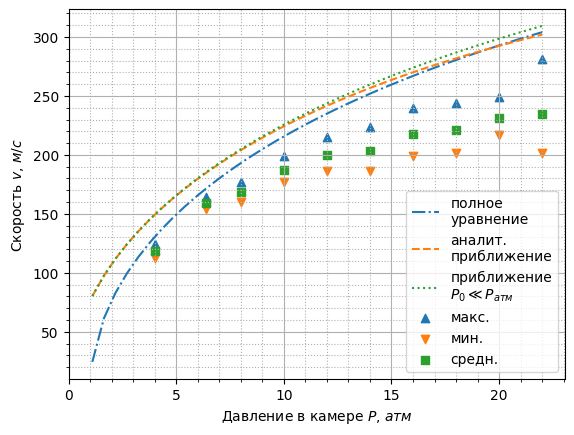

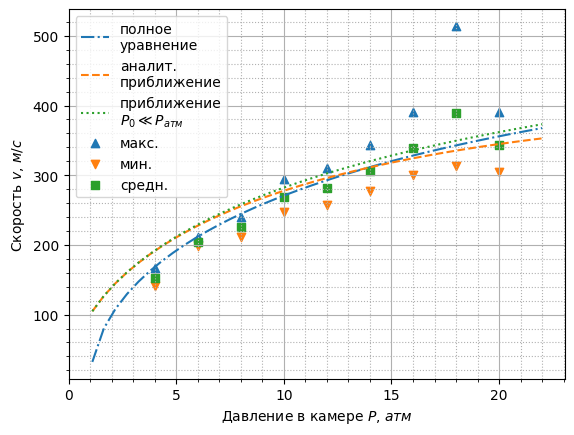

In [62]:
for i in range(2):
    fig,ax=plt.subplots()
    ps=np.linspace(1.1e5,55*40e5/100,40)
    vs1=np.array([])
    vs2=np.array([])
    vs3=np.array([])
    for p in ps:
        pr=(0.5,p,(np.pi*dp.D.iloc[i]**2/4)/1e6,dp.m.iloc[i]/1000,1.4,343)
        vs1=np.append(vs1,[A(*pr)])
        vs2=np.append(vs2,[NAN(*pr)])
        vs3=np.append(vs3,[NA(*pr)])
    ax.plot(ps/1e5,vs1, '-.', label="полное\nуравнение")
    ax.plot(ps/1e5,vs2, '--', label="аналит.\nприближение")
    ax.plot(ps/1e5,vs3, ':', label="приближение\n$P_{0}\ll P_{атм}$")
    ax.scatter(dv[i].P*40e5/100/1e5,dp.L.iloc[i]/dv[i].T1*1000,marker='^',label="макс.")
    ax.scatter(dv[i].P*40e5/100/1e5,dp.L.iloc[i]/dv[i].T2*1000,marker='v',label="мин.")
    ax.scatter(dv[i].P*40e5/100/1e5,dp.L.iloc[i]/dv[i].Ta*1000,marker='s',label="средн.")
    ax.minorticks_on()
    ax.grid(which='major')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim(xmin=0)
    ax.set_ylabel(r"Скорость $v$, $м/с$")
    ax.set_xlabel(r"Давление в камере $P$, $атм$")
    ax.legend()
    fig.savefig(f"vel{i}.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


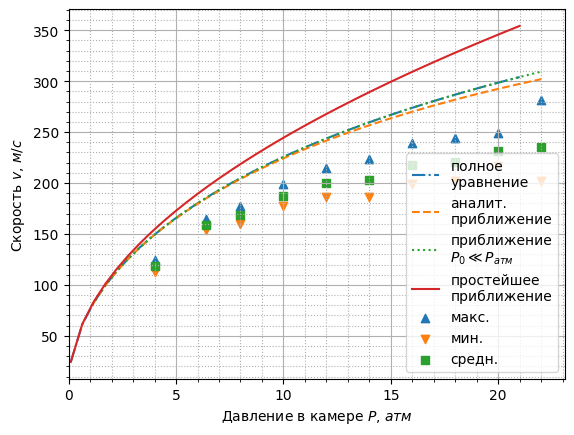

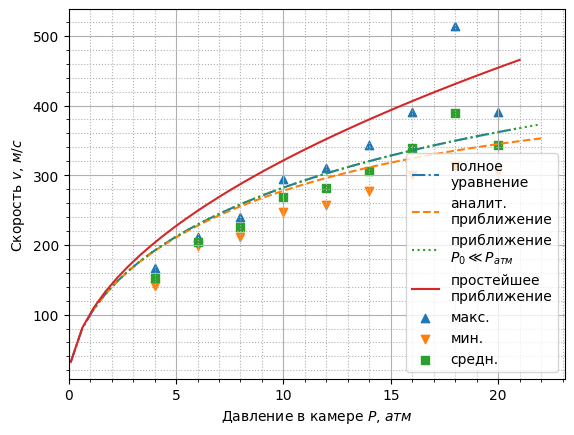

In [57]:
plt.style.use('default')
for i in range(2):
    fig,ax=plt.subplots()
    ps=np.linspace(1.1e5,55*40e5/100,40)
    vs1=np.array([])
    vs2=np.array([])
    vs3=np.array([])
    vs4=np.array([])
    for p in ps:
        pr=(0.5,p,(np.pi*dp.D.iloc[i]**2/4)/1e6,dp.m.iloc[i]/1000,1.4,343)
        vs1=np.append(vs1,[A(*pr)])
        vs2=np.append(vs2,[NAN(*pr)])
        vs3=np.append(vs3,[NA(*pr)])
        vs4=np.append(vs4,[SM(*pr)])
    ax.plot(ps/1e5-1,vs1, '-.', label="полное\nуравнение")
    ax.plot(ps/1e5,vs2, '--', label="аналит.\nприближение")
    ax.plot(ps/1e5,vs3, ':', label="приближение\n$P_{0}\ll P_{атм}$")
    ax.plot(ps/1e5-1,vs4, label="простейшее\nприближение")
    ax.scatter(dv[i].P*40e5/100/1e5,dp.L.iloc[i]/dv[i].T1*1000,marker='^',label="макс.")
    ax.scatter(dv[i].P*40e5/100/1e5,dp.L.iloc[i]/dv[i].T2*1000,marker='v',label="мин.")
    ax.scatter(dv[i].P*40e5/100/1e5,dp.L.iloc[i]/dv[i].Ta*1000,marker='s',label="средн.")
    ax.minorticks_on()
    ax.grid(which='major')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim(xmin=0)
    ax.set_ylabel(r"Скорость $v$, $м/с$")
    ax.set_xlabel(r"Давление в камере $P$, $атм$")
    ax.legend()
    fig.savefig(f"vel{i}.eps")
    fig.savefig(f"vel{i}.png")

In [48]:
def A2(L,p0,S,m,gamma,a0,gamma2=1.4):
    def dudt(t,p):
        F=(1-((p[0]/a0)**2)*(gamma-1)/2)**(gamma/(gamma-1))
        F+=-(1e5/p0) * (1-((p[0]/a0)**2)*(gamma2-1)/2)**(gamma2/(gamma2-1))
        d=np.array([0.,0.])
        d[1]=p[0]
        d[0]=F*p0*S/m
        #print(d)
        return d
    def event(t,p):
        return L-p[1]
    event.terminal = True
    event.direction = 0
    sol = solve_ivp(dudt, [0, 1], [0,0], events=event, dense_output=True, max_step=1e-6)
    t,u,x=sol.t,sol.y[0],sol.y[1]
    te=sol.t_events[0][0]
    x=x[t<=te]
    u=u[t<=te]
    t=t[t<=te]
    return t,x,u

In [60]:
pr=(10,10e5,(np.pi*dp.D.iloc[1]**2/4)/1e6,dp.m.iloc[1]/1000,1.4,343)
t,x,u=A2(*pr)

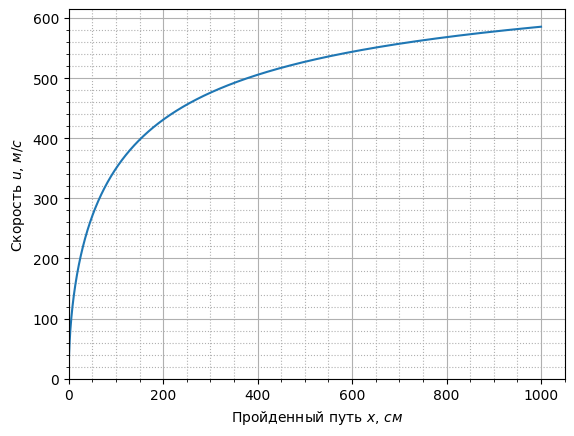

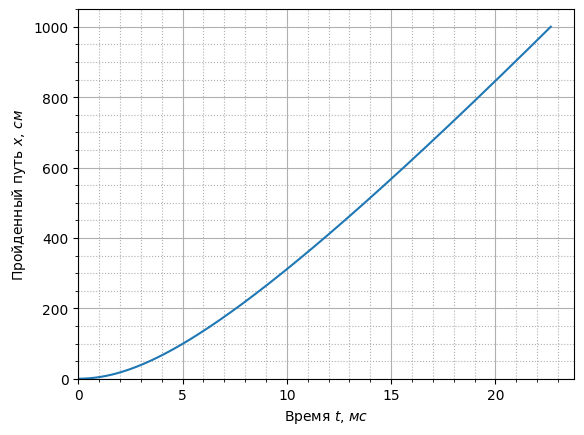

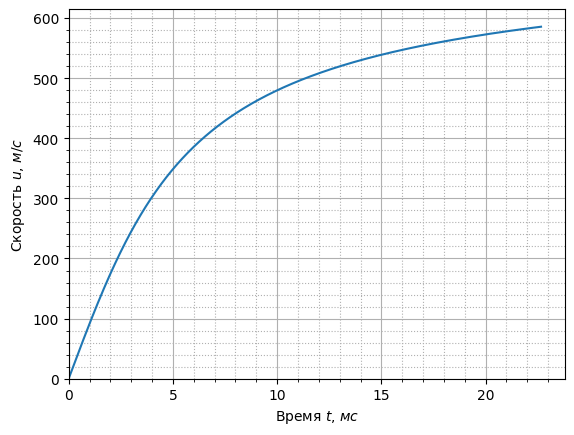

In [61]:
x=x*100
t=t*1000
fig,ax=plt.subplots()
ax.plot(x,u)
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
ax.set_ylabel(r"Скорость $u$, $м/с$")
ax.set_xlabel(r"Пройденный путь $x$, $см$")
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
fig.savefig(f"ux.png")
fig,ax=plt.subplots()
ax.plot(t,x)
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
ax.set_ylabel(r"Пройденный путь $x$, $см$")
ax.set_xlabel(r"Время $t$, $мс$")
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
fig.savefig(f"xt.png")
fig,ax=plt.subplots()
ax.plot(t,u)
ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
ax.set_xlabel(r"Время $t$, $мс$")
ax.set_ylabel(r"Скорость $u$, $м/с$")
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
fig.savefig(f"ut.png")